<a href="https://colab.research.google.com/github/rohithv-21/Hotel-booking-analysis/blob/main/Hotel_booking_analysis_(Team).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The given data set contains booking information for a city hotel and resort hotel, and it has information such as when the booking was made, length of stay, the number of adults, children, and babies, and the number of available parking spaces, among other things.**

**All personally identifying information has been removed from the data.**

**Explore and analyze the data to discover important factors that govern the bookings.**

In [5]:
# lets import the libraries required for data analysing

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
# lets import the data by mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# read the csv file

file_path ="/content/drive/MyDrive/Capstone Project/Rohith.V - Hotel booking analysis EDA/Hotel Bookings.csv"
hotel_booking_analysis_data = pd.read_csv(file_path)

In [8]:
# to get the top 5 rows from the imported data

hotel_booking_analysis_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [9]:
hotel_booking_analysis_data.shape

(119390, 32)

From the data we have 119390 rows and 32 columns

In [10]:
# lets analyze the data basically

hotel_booking_analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Data Processing**

Create a copy of the given dataset, so that our original dataset remains unchanged

In [161]:
# creating the copy of the given data

df = hotel_booking_analysis_data.copy()

In [89]:
# to find the sum of null rows 

df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**Data cleaning and handling of missing values**

Lets find the percentage of null values present in the dataset

In [55]:
# Create a function to find percentage of null values present

def percent_missing(df):
    percent_nan = df.isnull().sum() / len(df) * 100
    percent_nan = percent_nan[percent_nan>0].sort_values(ascending = False)
    return percent_nan 

In [59]:
percent_nan = percent_missing(df)
percent_nan

company     94.306893
agent       13.686238
country      0.408744
children     0.003350
dtype: float64

Text(0.5, 0, 'Null value Columns')

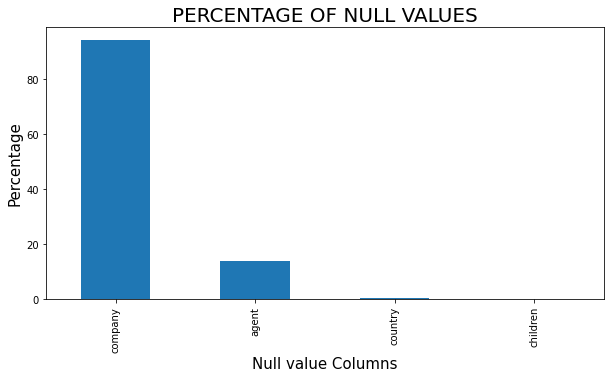

In [52]:
x = percent_nan.plot(figsize = (10,5) , kind = "bar")
plt.title('PERCENTAGE OF NULL VALUES' , fontsize = 20)
plt.ylabel('Percentage' , fontsize = 15)
plt.xlabel('Null value Columns' , fontsize = 15)

**Inference :** Clearly from the graph company column has got 94% and agent column has got 13% of null values where country and children columns has got less than 1%.

Since the company column has got 94% of the null values it is better to drop out this column

In [91]:
df.drop(["company"] ,axis = 1, inplace = True)

In [115]:
df.shape

(87376, 31)

We will fill the agent id with "Agent" and null agent id with "No Agent"

In [92]:
# First we will fill the agent ids with 'Agent'

df.loc[df.agent.isnull()==False,'agent']='Agent'

In [93]:
# Now we will fill the null values present in agent ids with 'No agent'

df.agent.fillna('No agent',inplace=True)

In [94]:
df[["agent"]].head()

,agent
0,No agent
1,No agent
2,No agent
3,Agent
4,Agent


We would fill the missing values in the country coulumns with 'Unknown' since we do not seem to find any references to other columns

In [95]:
df.country.fillna('Unknown',inplace=True)

In [96]:
df["country"]

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object

We would fill the missing values in the children column with 0

In [97]:
df.children.fillna(0,inplace=True)

In [114]:
df["children"]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
119385    0.0
119386    0.0
119387    0.0
119388    0.0
119389    0.0
Name: children, Length: 87376, dtype: float64

In [99]:
# lets check again if we have any nulls present in our dataset

df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

Remove the duplicate data if present

In [105]:
# checking for duplicate data
df.duplicated().sum()

32014

In [106]:
# removing the duplicate data
df.drop_duplicates(inplace = True)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87376 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87376 non-null  object 
 1   is_canceled                     87376 non-null  int64  
 2   lead_time                       87376 non-null  int64  
 3   arrival_date_year               87376 non-null  int64  
 4   arrival_date_month              87376 non-null  object 
 5   arrival_date_week_number        87376 non-null  int64  
 6   arrival_date_day_of_month       87376 non-null  int64  
 7   stays_in_weekend_nights         87376 non-null  int64  
 8   stays_in_week_nights            87376 non-null  int64  
 9   adults                          87376 non-null  int64  
 10  children                        87376 non-null  float64
 11  babies                          87376 non-null  int64  
 12  meal                           

Lets find the categorical features with their unique values 

In [111]:
#Check the categorical features with their unique values

categorical_features = ['hotel', 'is_canceled', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type',
'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']

print(f"Unique values by features \n")

for feature in categorical_features: 
  unique_values = df[feature].unique() 
  print(f"{feature}:\n {unique_values}\n")

Unique values by features 

hotel:
 ['Resort Hotel' 'City Hotel']

is_canceled:
 [0 1]

meal:
 ['BB' 'FB' 'HB' 'SC' 'Undefined']

country:
 ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'Unknown' 'ROU' 'NOR' 'OMN' 'ARG'
 'POL' 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS'
 'EST' 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX'
 'MAR' 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF'
 'AGO' 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN'
 'JAM' 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL'
 'GGY' 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL'
 'SEN' 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA'
 'CUB' 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP'
 'BDI' 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL'
 'UZB' 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND'
 'RWA' 'KHM' 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA'

#**Performing EDA**